# Metrics Analyses

This notebooks summarize metric's results on evaluation set, do learning, and plotting

In [4]:
import os
import json
import torch
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import pandas as pd
import seaborn as sns
import pprint

sns.set(font_scale=1.8)
sns.set_style("whitegrid", {
    "grid.linestyle": 'dashed',
    "axes.edgecolor": '#475569',
    'font.family': ['sans-serif'],
    'font.sans-serif': ['Arial',
        'Droid Sans',
        'sans-serif'
    ],
})

%matplotlib inline

ROOT_DIR = os.path.dirname(os.getcwd())
root_dir = Path(ROOT_DIR)

# Helper function for latex
def print_latex_table(data, multiplier=1):
    for item in data:
        str_line = f"{item['decoder_act']} & "
        means = item['mean'].cpu().detach().tolist()
        stds = item['std'].cpu().detach().tolist()
        for i_m in range(len(means)):
            m = round(means[i_m], 4) * multiplier
            if i_m == len(means) - 1:
                str_line += "$%.4f$ \\\\" % m
            else:
                str_line += "$%.4f$ & " % m

        print(str_line)

## 1. Gini Scores

Randomly initialized models
softmax & $0.2498$ & $0.2576$ & $0.2693$ & $0.2547$ & $0.2623$ & $0.2711$ \\
entmax15 & $0.8609$ & $0.8901$ & $0.8948$ & $0.8986$ & $0.8901$ & $0.8952$ \\
sparsemax & $0.9760$ & $0.9816$ & $0.9795$ & $0.9841$ & $0.9806$ & $0.9816$ \\
alpha_entmax & $0.7982$ & $0.8180$ & $0.8224$ & $0.8272$ & $0.8141$ & $0.8226$ \\
Trained models
softmax & $0.9626$ & $0.9884$ & $0.9814$ & $0.9809$ & $0.9438$ & $0.9432$ \\
entmax15 & $0.9764$ & $0.9913$ & $0.9877$ & $0.9884$ & $0.9902$ & $0.9888$ \\
sparsemax & $0.9940$ & $0.9961$ & $0.9973$ & $0.9966$ & $0.9970$ & $0.9971$ \\
alpha_entmax & $0.9535$ & $0.9267$ & $0.9675$ & $0.9832$ & $0.9657$ & $0.9531$ \\


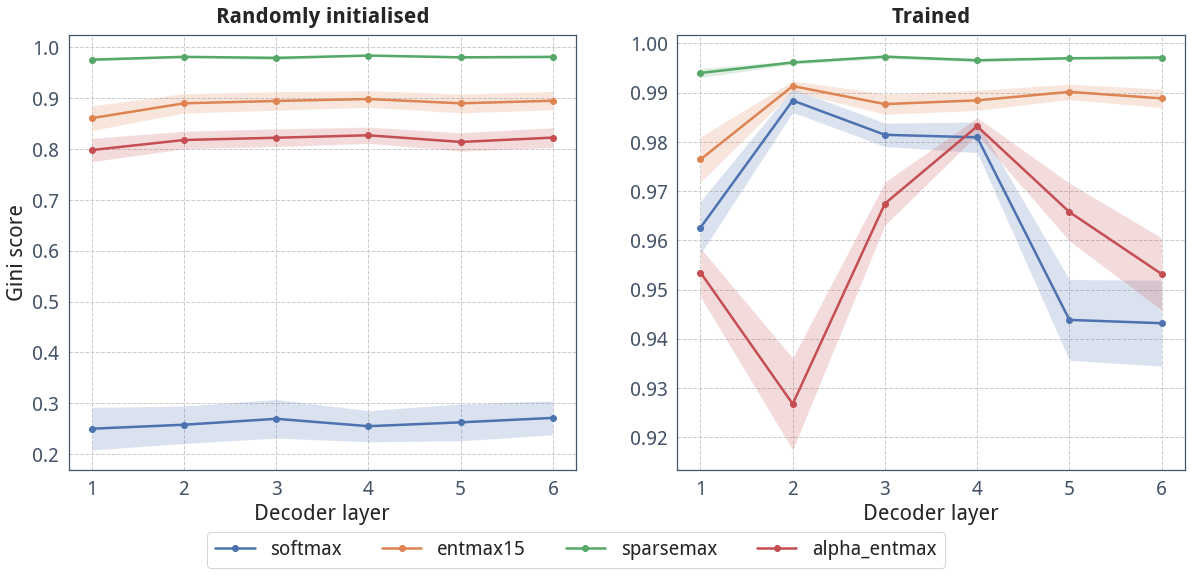

In [10]:
fig, axlist = plt.subplots(1, 2, figsize=(20, 8))

ax1, ax2 = axlist

# Randomly initialise
data = []
filenames = ["softmax-gini-random.pt", "entmax15-gini-random.pt", "sparsemax-gini-random.pt", "alpha_entmax-gini-random.pt"]
for fn in filenames:
    fpath = root_dir / "outputs" / "metrics" / "gini" / fn
    in_data = torch.load(fpath)
    item = {
        "decoder_act": in_data['decoder_act'],
        "mean": in_data['mean'],
        "std": in_data['std']
    }
    data.append(item)

print("Randomly initialized models")
print_latex_table(data)

for item in data:
    ax1.plot(item['mean'], marker='o', label=item['decoder_act'], linewidth=2.5)
    ax1.fill_between(np.arange(6), item['mean']-item['std'], item['mean']+item['std'], alpha=0.2)

ax1.set_title("Randomly initialised", pad=12, fontweight="bold")
ax1.set_xlabel("Decoder layer")
ax1.set_ylabel("Gini score")
ax1.tick_params(colors='#475569')
ax1.set_xticks(np.arange(6), np.arange(1, 7))

# Train models
data = []
filenames = ["softmax-gini.pt", "entmax15-gini.pt", "sparsemax-gini.pt", "alpha_entmax-gini.pt"]
for fn in filenames:
    fpath = root_dir / "outputs" / "metrics" / "gini" / fn
    in_data = torch.load(fpath)
    item = {
        "decoder_act": in_data['decoder_act'],
        "mean": in_data['mean'],
        "std": in_data['std']
    }
    data.append(item)

print("Trained models")
print_latex_table(data)

for item in data:
    ax2.plot(item['mean'], marker='o', label=item['decoder_act'], linewidth=2.5)
    ax2.fill_between(np.arange(6), item['mean']-item['std'], item['mean']+item['std'], alpha=0.2)

ax2.set_title("Trained", pad=12, fontweight="bold")
ax2.set_xlabel("Decoder layer")
ax2.tick_params(colors='#475569')
ax2.set_xticks(np.arange(6), np.arange(1, 7))

# Gather common legends
axlist.flatten()[-2].legend(loc='upper center', bbox_to_anchor=(1.0, -0.12), ncol=4)
fig.savefig("./images/presentations/gini-scores.png", bbox_inches='tight')
# fig.savefig("./images/gini-scores-w-a_entmax.pdf", bbox_inches='tight')

## 2. Percentage of Zero Entries

This section presents the results for **zero-entries ratio** metric that we have computed for the baseline softmax, entmax15 and sparsemax models, both randomly initialised and trained.

Randomly initialized models
softmax & $0.0000$ & $0.0000$ & $0.0000$ & $0.0000$ & $0.0000$ & $0.0000$ \\
entmax15 & $74.7900$ & $77.7500$ & $79.3300$ & $78.7400$ & $78.1900$ & $79.0000$ \\
sparsemax & $96.0800$ & $96.9800$ & $96.7500$ & $97.3400$ & $96.8500$ & $97.0100$ \\
alpha_entmax & $57.6500$ & $58.9600$ & $58.2600$ & $59.5600$ & $61.8000$ & $60.3000$ \\
Trained models
softmax & $71.1400$ & $91.0900$ & $85.9700$ & $88.6300$ & $70.8300$ & $66.2600$ \\
entmax15 & $95.4100$ & $98.2500$ & $97.3600$ & $97.6500$ & $97.8800$ & $97.7600$ \\
sparsemax & $99.1200$ & $99.4200$ & $99.5900$ & $99.4700$ & $99.5500$ & $99.5800$ \\
alpha_entmax & $31.7900$ & $49.3300$ & $50.5100$ & $60.7200$ & $60.0200$ & $36.8400$ \\


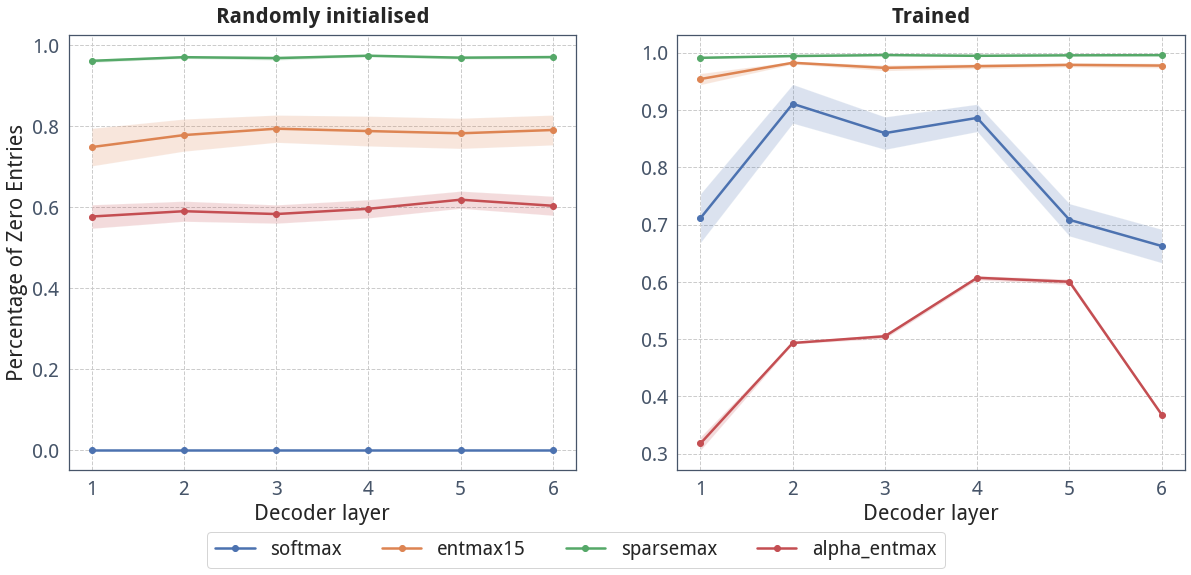

In [12]:
fig, axlist = plt.subplots(1, 2, figsize=(20, 8))

ax1, ax2 = axlist

# Randomly initialise
data = []
filenames = ["softmax-zeros_ratio-1e-06-random.pt", "entmax15-zeros_ratio-random.pt", "sparsemax-zeros_ratio-random.pt", "alpha_entmax-zeros_ratio-random.pt"]
for fn in filenames:
    fpath = root_dir / "outputs" / "metrics" / "zeros_ratio" / fn
    in_data = torch.load(fpath)
    item = {
        "decoder_act": in_data['decoder_act'],
        "mean": in_data['mean'],
        "std": in_data['std']
    }
    data.append(item)
print("Randomly initialized models")
print_latex_table(data, multiplier=100)

for item in data:
    ax1.plot(item['mean'], marker='o', label=item['decoder_act'], linewidth=2.5)
    ax1.fill_between(np.arange(6), item['mean']-item['std'], item['mean']+item['std'], alpha=0.2)

ax1.set_title("Randomly initialised", pad=12, fontweight="bold")
ax1.set_xlabel("Decoder layer")
ax1.set_ylabel("Percentage of Zero Entries")
ax1.tick_params(colors='#475569')
ax1.set_xticks(np.arange(6), np.arange(1, 7))

# Train models
data = []
filenames = ["softmax-zeros_ratio-1e-06.pt", "entmax15-zeros_ratio.pt", "sparsemax-zeros_ratio.pt", "alpha_entmax-zeros_ratio.pt"]
for fn in filenames:
    fpath = root_dir / "outputs" / "metrics" / "zeros_ratio" / fn
    in_data = torch.load(fpath)
    item = {
        "decoder_act": in_data['decoder_act'],
        "mean": in_data['mean'],
        "std": in_data['std']
    }
    data.append(item)

print("Trained models")
print_latex_table(data, multiplier=100)

for item in data:
    ax2.plot(item['mean'], marker='o', label=item['decoder_act'], linewidth=2.5)
    ax2.fill_between(np.arange(6), item['mean']-item['std'], item['mean']+item['std'], alpha=0.2)

ax2.set_title("Trained", pad=12, fontweight="bold")
ax2.set_xlabel("Decoder layer")
ax2.tick_params(colors='#475569')
ax2.set_xticks(np.arange(6), np.arange(1, 7))

# Gather common legends
axlist.flatten()[-2].legend(loc='upper center', bbox_to_anchor=(1.0, -0.12), ncol=4)
fig.savefig("./images/presentations/pze_scores.png", bbox_inches='tight')
# fig.savefig("./images/perc_zeros-scores_w-a_entmax.pdf", bbox_inches='tight')

## 3. Percentage of Attentions Inside Bounding Boxes (PAIBB)

In [36]:
def read_data(fname: str):
    metric_dir = root_dir / "outputs" / "metrics" / "paibb"

    data = []
    fpath = metric_dir / fname
    with open(fpath, "r") as f:
        for line in f:
            # Replace single quotes with double quotes for JSONEncoder to work
            line = line.replace("\'", "\"")
            item = json.loads(line)
            data.append(item)


    df = pd.DataFrame(data)
    return df

**Collect data for visualization**

In [37]:
softmax_df = read_data("paibb_softmax.txt")
entmax15_df = read_data("paibb_entmax15.txt")
sparsemax_df = read_data("paibb_sparsemax.txt")
alpha_entmax_df = read_data("paibb_alpha_entmax.txt")

data = [
    {'model': 'softmax', 'mean': softmax_df['paibb'].mean(), 'std': softmax_df['paibb'].std()},
    {'model': 'entmax15', 'mean': entmax15_df['paibb'].mean(), 'std': entmax15_df['paibb'].std()},
    {'model': 'sparsemax', 'mean': sparsemax_df['paibb'].mean(), 'std': sparsemax_df['paibb'].std()},
    {'model': 'alpha_entmax', 'mean': alpha_entmax_df['paibb'].mean(), 'std': alpha_entmax_df['paibb'].std()},
]

df = pd.DataFrame(data)

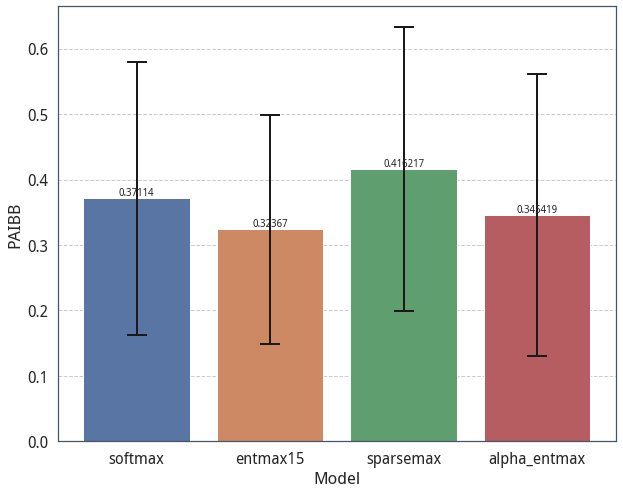

In [38]:
fig, ax = plt.subplots(figsize=(10, 8))
sax = sns.barplot(data=df, x='model', y='mean', ax=ax)

ax.set_xlabel("Model")
ax.set_ylabel("PAIBB")
x_coords = [p.get_x() + 0.5 * p.get_width() for p in sax.patches]
y_coords = [p.get_height() for p in sax.patches]
plt.errorbar(x=x_coords, y=y_coords, yerr=df['std'], fmt="none", c="k", capsize=10, elinewidth=2, markeredgewidth=2)
sax.bar_label(sax.containers[0])
fig.savefig("./images/paibb-scores-w-a_entmax.png", bbox_inches='tight')
fig.savefig("./images/paibb-scores-w-a_entmax.pdf", bbox_inches='tight')

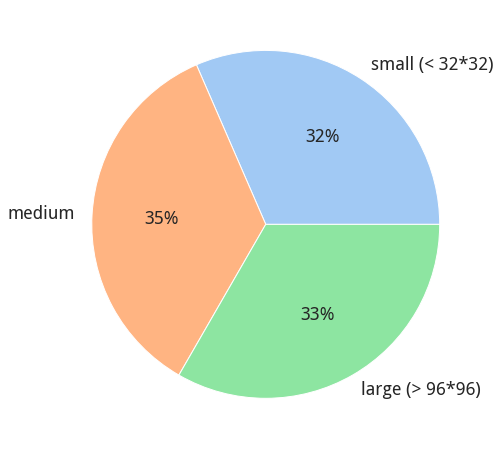

In [39]:
small = softmax_df[softmax_df.gt_area < 32*32].count()[0]
medium = softmax_df[(softmax_df.gt_area >= 32*32) & (softmax_df.gt_area <= 96*96)].count()[0]
large = softmax_df[softmax_df.gt_area > 96*96].count()[0]

total = small +  medium +  large
data = [small / total * 100, medium / total * 100, large / total * 100]
labels = ['small (< 32*32)', 'medium', 'large (> 96*96)']
colors = sns.color_palette('pastel')[0:3]

fig, ax = plt.subplots(figsize=(8, 8))
patches, texts, autotexts = plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%', textprops={'fontsize': 18})
# plt.legend()
fig.set_facecolor('white')
fig.savefig("images/object_size_dist.png", bbox_inches='tight')
fig.savefig("images/object_size_dist.pdf", bbox_inches='tight')

In [40]:
def get_stat(frame):
    small_df = frame[frame.gt_area < 32*32]
    medium_df = frame[(frame.gt_area >= 32*32) & (frame.gt_area <= 96*96)]
    large_df = frame[frame.gt_area > 96*96]
    return {
        "small_mean": small_df['paibb'].mean(),
        "small_std": small_df['paibb'].std(),
        "medium_mean": medium_df['paibb'].mean(),
        "medium_std": medium_df['paibb'].std(),
        "large_mean": large_df['paibb'].mean(),
        "large_std": large_df['paibb'].std(),
    }

In [41]:
data = [
    {'model': 'softmax', **get_stat(softmax_df)},
    {'model': 'entmax15', **get_stat(entmax15_df)},
    {'model': 'sparsemax', **get_stat(sparsemax_df)},
    {'model': 'alpha_entmax', **get_stat(alpha_entmax_df)}
]
data

[{'model': 'softmax',
  'small_mean': 0.13728416198820537,
  'small_std': 0.09979179315066726,
  'medium_mean': 0.38441363122233224,
  'medium_std': 0.10712226121350392,
  'large_mean': 0.5783941981651309,
  'large_std': 0.1199225565515612},
 {'model': 'entmax15',
  'small_mean': 0.1356498508542671,
  'small_std': 0.09855936231022691,
  'medium_mean': 0.3522581305859413,
  'medium_std': 0.09733333497237832,
  'large_mean': 0.47139488903156473,
  'large_std': 0.12920158943213675},
 {'model': 'sparsemax',
  'small_mean': 0.1691744504791382,
  'small_std': 0.12574293850834092,
  'medium_mean': 0.45450654996058315,
  'medium_std': 0.12498748392359343,
  'large_mean': 0.609549039364787,
  'large_std': 0.11267443513453679},
 {'model': 'alpha_entmax',
  'small_mean': 0.11510945537736356,
  'small_std': 0.08386481046426573,
  'medium_mean': 0.3347031195146201,
  'medium_std': 0.09613278082194306,
  'large_mean': 0.5746336702344172,
  'large_std': 0.14102969516248845}]

In [52]:
for item in data:
    str_line = item['model'] + " & "
    s_mean = item['small_mean'] * 100
    m_mean = item['medium_mean'] * 100
    l_mean = item['large_mean'] * 100
    str_line += f"${s_mean:.2f}$ & ${m_mean:.2f}$ & ${l_mean:.2f}$ \\\\"

    print(str_line)

softmax & $13.73$ & $38.44$ & $57.84$ \\
entmax15 & $13.56$ & $35.23$ & $47.14$ \\
sparsemax & $16.92$ & $45.45$ & $60.95$ \\
alpha_entmax & $11.51$ & $33.47$ & $57.46$ \\


float